# **Predict Cancer Mortality Rates in US Counties**
The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
root_dir = r'C:\Users\marcu\OneDrive\Desktop\Uni\COMP5611M\cw' # this is to be defined by you 
local_path = r'\datasets\COMP5611M_Assessment'"\\" # store the related data files in this folder

data_dir = root_dir + local_path

## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exploration**


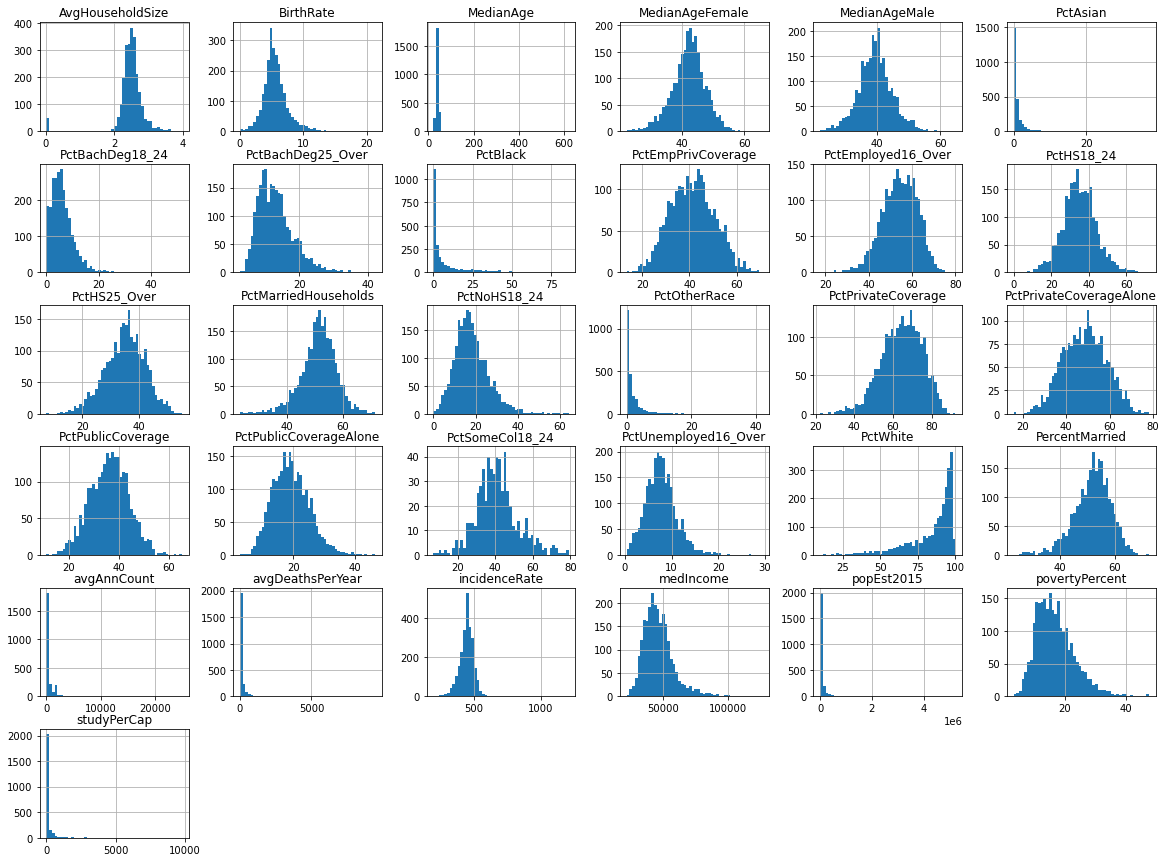

In [3]:
# Read in files
df = pd.read_csv (training_data_path)
targets = pd.read_csv (training_targets_path)

# Plot Histograms
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15));

### Feature Distributions
A mix of Gaussian and exponential distributions comprise the features in the mortality dataset, with exponentially distributed features spanning ethnicity criterion, average reports of cancer diagnosed anually, average deaths per year and the number of clinical studies in counties on heart failure per capita. The Gaussian distributed features can be seen by a somewhat symmetric bell-shape density whilst the exponential distributed features contain large densities within a small domain and a long tail.

### Identifying Outliers
A standard approach to define outliers are values outside the interval $I$ such that

$$I=[q_{0.25}-1.5\cdot IQR,q_{0.75}+1.5\cdot IQR],$$

where $q_{0.25}$ and $q_{0.75}$ denote the upper and lower quartiles and $IQR=q_{0.75}-q_{0.25}$ the interquartile range. However, given our knowledge of feature distributions, this definition only makes sense for Gaussian distributed features - exponentially distributed features would have the tail-end identified as an outlier. We must us also take care with the scale factor chosen which is 1.5 in the denfinition above - feature context should be considered.


### Unusual Values
We define unusual values to be observations that common sense determines false based off the context of the feature in question. Unusual values are as follows.

1. Some US counties have an average household size of less than 1. Yes, one may argue that this may be due to empty households where nobody lives in the building or from families owning more than one house in a county however, this should not be such a large enough occurence in a county to warrant such an **AverageHouseholdSize** value. 

In [4]:
AvgHouseholdSize_Unusual = df["AvgHouseholdSize"][df["AvgHouseholdSize"]<1].tolist()
print(AvgHouseholdSize_Unusual)

[0.0261, 0.0222, 0.0237, 0.0249, 0.024, 0.023, 0.026000000000000002, 0.0222, 0.026000000000000002, 0.0248, 0.0251, 0.027000000000000003, 0.0248, 0.0248, 0.0257, 0.0253, 0.0263, 0.0225, 0.0241, 0.0277, 0.025, 0.0249, 0.0241, 0.0254, 0.0242, 0.0243, 0.027999999999999997, 0.0277, 0.0261, 0.0248, 0.0221, 0.024, 0.0248, 0.0259, 0.0242, 0.0245, 0.026000000000000002, 0.0268, 0.0239, 0.0243, 0.0268, 0.0243, 0.0271, 0.0236, 0.027000000000000003, 0.0273, 0.0242, 0.0248]


2. The median age of a county obviously cannot be greater than the average lifespan of a human of say 80 years however such observations do indeed occur in **MedianAge**:

In [5]:
MedianAge_Unusual = df["MedianAge"][df["MedianAge"]>80].tolist()
print(MedianAge_Unusual)

[496.8, 458.4, 349.2, 502.8, 430.8, 508.8, 412.8, 406.8, 498.0, 519.6, 511.2, 508.8, 424.8, 470.4, 501.6, 496.8, 500.4, 469.2, 536.4, 523.2, 535.2, 481.2, 619.2, 546.0, 579.6, 414.0]


### Correlations
The top 5 features with strongest correlations to **TARGET_deathRate** are **PctBachDeg25_Over**, **incidenceRate**, **PctPublicCoverageAlone**, **medIncome** and **povertyPercent** with absolute correlation coefficients ranging from 0.49 to 0.41 respectively - please see chunk output below for specific correlation values for the features.

In [6]:
# Appends Target
df["TARGET_deathRate"] = targets["TARGET_deathRate"]

# Correlations against Target
corr_matrix = df.corr()
print("-------Feature----------Correlation to Target----")
display(corr_matrix["TARGET_deathRate"].sort_values(ascending=False))

# Drops Target
df = df.drop(columns=["TARGET_deathRate"])

-------Feature----------Correlation to Target----


TARGET_deathRate           1.000000
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0

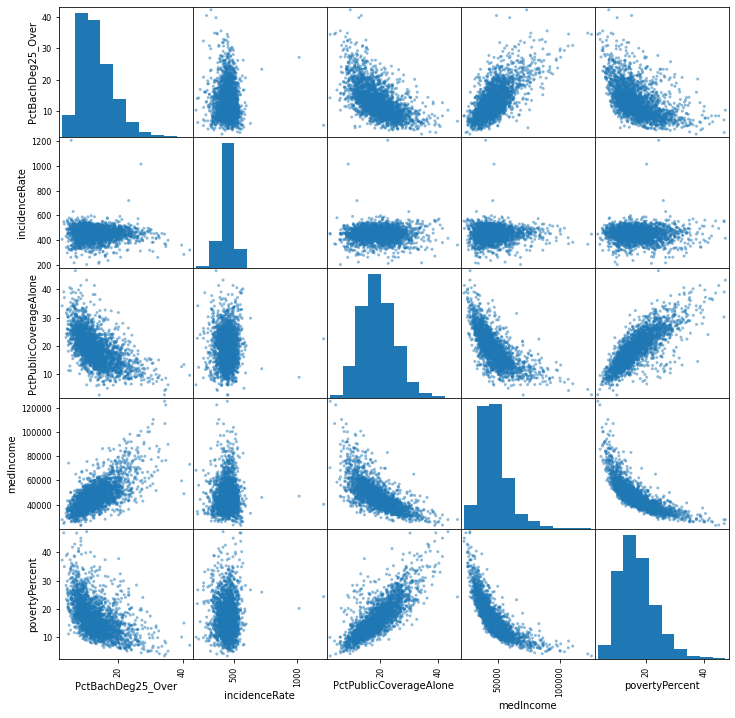

In [7]:
# Scatter plot matrix of top 5 features with highest correlations towards target
from pandas.plotting import scatter_matrix
attributes=["PctBachDeg25_Over","incidenceRate","PctPublicCoverageAlone","medIncome","povertyPercent"]

%matplotlib inline
import matplotlib.pyplot as plt
scatter_matrix(df[attributes], figsize=(12, 12));

In [8]:
# Correlation between most correlated features to target
print("medIncome ~ povertyPercent correlation coeff = ",df["medIncome"].corr(df["povertyPercent"]))
print("PctPiblicCoverageAlone ~ povertyPercent correlation coeff = ",df["PctPublicCoverageAlone"].corr(df["povertyPercent"]))

medIncome ~ povertyPercent correlation coeff =  -0.7846515804943212
PctPiblicCoverageAlone ~ povertyPercent correlation coeff =  0.7915951275930203


Strongest negative annd positive correlations are seen between **medIncone ~ povertyPercent** and 
**PctPublicCoverageAlone ~ povertyPercent** with correlations values of -0.78 and 0.79 respectively.

# **Pipeline**


In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

# Imputes Unusual values defined in Exercise 1 as Missing values
class UnusualValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.replace(AvgHouseholdSize_Unusual, np.nan)
        X = X.replace(MedianAge_Unusual, np.nan)
        return X.values

In [10]:
# Removes highly correlated features
class CorrelatedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = np.delete(X,5,1)
        return X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pre-processed training data. The pipeline converts unusual values to missing values
# ,removes highly correlated features, imputes missing values
# as the median value of the feature space and performs z-standardisation onto the data.
num_pipeline = Pipeline([
    ('unusual',UnusualValues()),
    ('cor_feature',CorrelatedFeatures()),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

# Processed df
df_tr = num_pipeline.fit_transform(df)

In [12]:
df_tr.shape

(2438, 30)

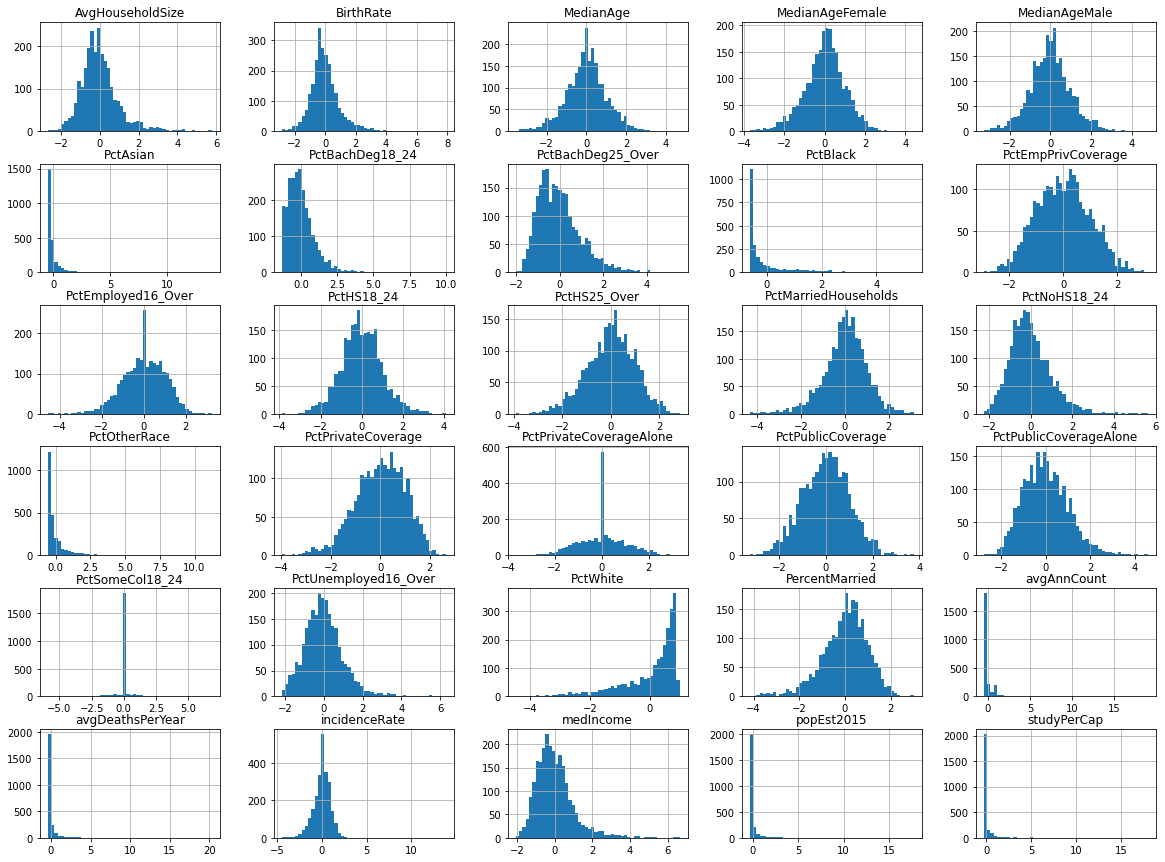

In [13]:
# Histogram post processing - this is useful to check our data processing worked as intended
names = df.columns.tolist()
names.remove('povertyPercent')
names
# duplicates processed data in order to convert to pandas df to make histogram
df_tr_test = df_tr
df_tr_test = pd.DataFrame(data=df_tr,columns=names)

#histogram
df_tr_test.hist(bins=50,figsize=(20,15));

# **Modelling**


### Linear Regression Models
OLS, Lasso and Ridge linear regression models with suitable regularisation weights for Lasso and Ridge regression taking respective values

$$\alpha^* = \{0.055,32.5\}.$$

Justification for $\alpha^*$ values is as follows. We consider values $\alpha∈\{0.001,0.005,0.055,0.06,0.065,0.1,1\}$ for Lasso and values $\alpha∈\{1,20,30,32.5,35,37.5,40,100\}$ for Ridge, choosing the value with greatest predictive performance for each model. Predictive performance is determined by the root mean squared error (RMSE) metric - the smaller RMSE determines a model with greater performance. The reasoning behind these regularisation weight considerations stems from 'playing' with the model. 10-fold cross-validation is a strategy used, this will help prevent overfitting and increase information gained from our models.

In [14]:
from sklearn.linear_model import LinearRegression

# OLS Linear Regression
myOLS = LinearRegression().fit(df_tr, targets)

In [15]:
from sklearn.linear_model import Lasso

# Lasso Linear Regression with suitable alpha
myLasso = Lasso(alpha=0.055).fit(df_tr, targets)

In [16]:
from sklearn.linear_model import Ridge

# Ridge Linear Regression with suitable alpha
myRidge = Ridge(alpha=32.5).fit(df_tr, targets)

### Grid Search - Optimising Regularisation Weights $\alpha$

In [17]:
from sklearn.model_selection import GridSearchCV

# ---- Lasso ----
# Alpha values to consider
L_alphas = {'alpha':[0.001,0.005,0.055,0.06,0.065,0.1,1]}
            
# Grid search applied to alphas values and data with folds = 10
L_grid_search = GridSearchCV(Lasso(), param_grid=L_alphas, cv=10,scoring='neg_mean_squared_error')
L_grid_search.fit(df_tr, targets)

# Lasso optimum alpha   
L_grid_search.best_params_
print("A suitable regularisation weight for Lasso is:", L_grid_search.best_estimator_)

# All alpha results
L_cvres = L_grid_search.cv_results_
for mean_score, params in zip(L_cvres["mean_test_score"],L_cvres["params"]):
    print(np.sqrt(-mean_score),params)

A suitable regularisation weight for Lasso is: Lasso(alpha=0.055)
19.317365853865155 {'alpha': 0.001}
19.311549981753043 {'alpha': 0.005}
19.297650141295495 {'alpha': 0.055}
19.29875804353552 {'alpha': 0.06}
19.300263933832028 {'alpha': 0.065}
19.317679238486527 {'alpha': 0.1}
19.610079277996043 {'alpha': 1}


In [18]:
# ---- Ridge ----
# Alpha values to consider
R_alphas = {'alpha':[1,20,30,32.5,35,37.5,40,100]}
            
# Grid search applied to alphas values and data with folds = 10
R_grid_search = GridSearchCV(Ridge(), param_grid=R_alphas, cv=100,scoring='neg_mean_squared_error')
R_grid_search.fit(df_tr, targets)

# Ridge optimum alpha   
R_grid_search.best_params_                    
print("A suitable regularisation weight for Ridge is:",R_grid_search.best_estimator_)

# All alpha results
R_cvres = R_grid_search.cv_results_
for mean_score, params in zip(R_cvres["mean_test_score"],R_cvres["params"]):
    print(np.sqrt(-mean_score),params)

A suitable regularisation weight for Ridge is: Ridge(alpha=32.5)
19.306275627346817 {'alpha': 1}
19.286281312983302 {'alpha': 20}
19.28445341170259 {'alpha': 30}
19.284450823724832 {'alpha': 32.5}
19.284586693647928 {'alpha': 35}
19.284844996210563 {'alpha': 37.5}
19.285211997755106 {'alpha': 40}
19.309483531372578 {'alpha': 100}


### Model Performance Comparison
There are numerous performance metrics that we may compare our linear regression models against each other with - RMSE is chosen with outputs seen below. As mentioned prior the lower the RMSE the greater the predictive performance of the model thus **Ridge linear regression seems to be our preferred model** under this performance metric with the lowest RMSE = 19.264 in comparison to RMSE = 19.274 and RMSE = 19.296 produced by Lasso and OLS models respectively. Furthermore, Ridge obtains the a low  standard deviation $\sigma$ throughout 10-fold cross-validation with a value of $\sigma=0.945$ - see code output below. Ridge is deemed to be marginally more stable than Lasso regression.

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Function that takes a model as an input, applies cross-validation
# and outputs the root mean squared error for each fold
def model_scores(model):
    scores = cross_val_score(model, df_tr, targets.values.ravel(),scoring="neg_mean_squared_error", cv=10)
    model_rmse_scores = np.sqrt(-scores)
    return model_rmse_scores

# Mean RMSE value for chosen model
def mean_model_scores(model):
    return model_scores(model).mean()

# Standard Deviation of RMSE value for chosen model
def std_model_scores(model):
    return model_scores(model).std()

# Outputs RMSE value for the suitable alphas chosen for all models
print("OLS RMSE = ", mean_model_scores(myOLS), "with standard deviation = ", std_model_scores(myOLS))
print("Lasso RMSE = ", mean_model_scores(myLasso), "with standard deviation = ", std_model_scores(myLasso))
print("Ridge RMSE = ", mean_model_scores(myRidge), "with standard deviation = ", std_model_scores(myRidge))

OLS RMSE =  19.29596731786227 with standard deviation =  0.9420018511836866
Lasso RMSE =  19.27394198663266 with standard deviation =  0.9562746842621921
Ridge RMSE =  19.263980626652074 with standard deviation =  0.9452028637706


### Visualisation Of Model Performances

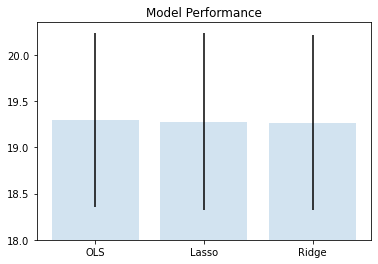

In [20]:
import matplotlib.pyplot as plt

# bar plot of RMSE score with whiskers denoting deviation throughout cross-validation folds
means = [mean_model_scores(myOLS)-18,mean_model_scores(myLasso)-18,mean_model_scores(myRidge)-18]
y_r = [std_model_scores(myOLS),std_model_scores(myLasso),std_model_scores(myRidge)]
plt.bar(range(len(means)), means, yerr=y_r, alpha=0.2, align='center',bottom=18,)
plt.xticks(range(len(means)), ['OLS', 'Lasso', 'Ridge'])
plt.title("Model Performance")
plt.show()

### Evaluation On The Test Set
Here we clarify that our cross-validation strategy is working as intended by partitioning our dataframe manually into training and testing sets, with equivalent analysis and with the goal to find similar results in both scenarios. We find the RMSE seen across these models are less than our averages seen via cross-validation - they are only marginally less however (see code output), thus are cross-validation results seem satisfactory .

In [21]:
from sklearn.model_selection import train_test_split

# Train test = 80%:20% split
X_train, X_test, y_train, y_test = train_test_split(df_tr, targets, test_size=0.2, random_state=42)

# ----Train Models----

# OLS Linear Regression
myOLStest = LinearRegression().fit(X_train, y_train)

# Lasso Linear Regression
myLassotest = Lasso(alpha=0.055).fit(X_train, y_train)

# Ridge Linear Regression
myRidgetest = Ridge(alpha=32.5).fit(X_train, y_train)

In [22]:
from sklearn.metrics import mean_squared_error

# ----Test Models____

# OLS test
OLS_predictions = myOLStest.predict(X_test)
OLS_mse=mean_squared_error(y_test, OLS_predictions)
OLS_rmse=np.sqrt(OLS_mse)
print("OLS rmse = ", OLS_rmse)

# Lasso test
Lasso_predictions = myLassotest.predict(X_test)
Lasso_mse=mean_squared_error(y_test, Lasso_predictions)
Lasso_rmse=np.sqrt(Lasso_mse)
print("Lasso rmse = ", Lasso_rmse)

# Ridge test
Ridge_predictions = myRidgetest.predict(X_test)
Ridge_mse=mean_squared_error(y_test, Ridge_predictions)
Ridge_rmse=np.sqrt(Ridge_mse)
print("Ridge rmse = ", Ridge_rmse)


OLS rmse =  18.69085879924146
Lasso rmse =  18.696098423424626
Ridge rmse =  18.68635935875499


# **Feature Importance**


### Lasso Regression Feature Importance
Using lasso regression with the suitable regularisiation weight chosen that is, $\alpha^*=0.055$, we identify the five most important features by considering feature coefficients of the model. The larger the absolute value of a feature coefficient the greater impact the feature pertains towards model output. Thus we find in descending order the relevant features with coefficents values given:

1. **incidenceRate**: 10.67
2. **PctBachDeg25_Over**: -7.25
3. **PctPrivateCoverage**: -7.22
4. **avgDeathsPerYear**: 5.36
5. **PctMarriedHouseholds**: -5.21




In [23]:
# Lasso feature coefficents absolute values
Lasso_coef = np.absolute(myLasso.coef_)

# Index of top 5 features in descending order
Indx = Lasso_coef.argsort()[-5:][::-1]
print("The top 5 features of Lasso regression in descending order:")
print(np.array(names)[Indx])
print("There coefficients are:")
print(myLasso.coef_[Indx])

The top 5 features of Lasso regression in descending order:
['incidenceRate' 'PctBachDeg25_Over' 'PctPrivateCoverage'
 'avgDeathsPerYear' 'PctMarriedHouseholds']
There coefficients are:
[10.66774238 -7.24662505 -7.21731958  5.36112432 -5.20560841]


# **Random Forest**


### Random Forest Tuning Hyperparameters
There are plenty of hyperparameters to alter in order to maximise model predictive performance for the random forest model. Our goal is to find a reasonable range of hyperparamter values to consider using **RandomizedSearchCV**, then subsequently tune our paramters in greater detail with grid searching across this domain. We will consider varying the number of decision trees produced in a random forest model, the number of features considered when training the model, the maximum depth of the decision trees, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node and whether bootstrap samples are used when building trees. **RandomizedSearchCV** will be useful here as this function randomly picks a combination of these hyperparamter inputs and applies the random forest algorithm with cross-validation applied and can output the highest performing hyperparameter combination - please see code below or hyperparamter possibilities chosen.

In [24]:
from sklearn.model_selection import RandomizedSearchCV
#----Producing Hyperparamter grid for Random Search ----

# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 250, stop = 1000, num = 5)]

# No. of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Max no. of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)

# Min no. of samples required to split a node
min_samples_split = [8, 10,12,14,16]

# Min no. of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Bootstrap data whilst training?
bootstrap = [True, False]

# Creates the hyperparamater random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [250, 437, 625, 812, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [8, 10, 12, 14, 16], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
from sklearn.ensemble import RandomForestRegressor
# ----Apply random forest for random selections of hyperparamaters----

# base model
rf = RandomForestRegressor()

# Random search of hyperparameters, with 5 fold cross-validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose=5, random_state=123, n_jobs = -1)

# Fit the random search model
rf_random.fit(df_tr, targets.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 47.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 16, 27, 38, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [8, 10, 12, 14,
                                                              16],
                                        'n_estimators': [250, 437, 625, 812,
                                                         1000]},
                   random_state=123, verbose=5)

In [26]:
# Best hyperparamter combination found
rf_random.best_params_

{'n_estimators': 437,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 27,
 'bootstrap': True}

In [27]:
from sklearn.model_selection import GridSearchCV

#----Producing Hyperparamter grid for Grid Search ----

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [26,27,28],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [7,8,9],
    'n_estimators': [400,425,450]
}
# Create a based model
rf = RandomForestRegressor()

# Grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 5)

# Fit the grid search to the data
grid_search.fit(df_tr, targets.values.ravel())

# Best hyperparamater combination
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 24.5min finished


{'bootstrap': True,
 'max_depth': 28,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 400}

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# RF Model
myforest = RandomForestRegressor(bootstrap=True,max_depth=28,max_features='auto',min_samples_leaf=3,
                                 min_samples_split= 7,n_estimators= 450)
myforest.fit(df_tr,targets.values.ravel())

RandomForestRegressor(max_depth=28, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=450)

### Random Forest vs Ridge Regression (highest performing regressor)
Again, we use RMSE to evaluate predictive performance of random forest and Lasso regression with 10-fold cross-validation applied as a strategy to prevent overfitting. Although random forest provides the lowest RMSE values on average (see code output below), the model is substantially more unstable under the RMSE metric with a deviation seen of $\sigma=1.29$ in comparrison to Lasso with a standard deviation of $\sigma=0.97$ - almost a 33% increase in error instability.

In [29]:
# Outputs RMSE value with 10-F-CV
print("Ridge RMSE = ", mean_model_scores(myRidge), "with standard deviation = ", std_model_scores(myRidge))
print("RF RMSE = ", mean_model_scores(myforest), "with standard deviation = ", std_model_scores(myforest))

Ridge RMSE =  19.263980626652074 with standard deviation =  0.9452028637706
RF RMSE =  18.627956626753505 with standard deviation =  1.3508971121412838


### Random Forest Feature Importance - based on mean decrease in impurity (MDI)
Being an ensemble method, random forest bootstrap aggregates many poor performing decision tree models with the goal to produce one high performing model. Whilst this strategy is highly effective, a downside is that our outputs are less interpretable - we do not posses the option to consider feature coefficients as accomplished when analysing our Ridge regression model.

Here, we identify the five most important features by considering mean decrease in impurity generated with respect to the feature inputs - the greater decrease the greater relevance the feature pertains. The bar plot below indicates the top 5 performing features for random forest; in descending order that is,

1. **PctBachDeg25_Over** 0.237708
2. **incidenceRate**: 0.212809
3. **PctHS25_Over**: 0.046930
4. **medIncome**: 0.044264
5. **avgDeathsPerYear**:  0.036751

Compare this to the feature importance seen in Ridge, as a reminder these are:

1. **incidenceRate**: 10.67
2. **PctBachDeg25_Over**: -7.25
3. **PctPrivateCoverage**: -7.22
4. **avgDeathsPerYear**: 5.36
5. **PctMarriedHouseholds**: -5.21

Both models are dominated by the equivalent two features **PctBachDeg25_Over** and **incidenceRate** however in random forest, the disparity between these two dominat features and the remaining inputs is far more pronounced. **PctBachDeg25_Over** and **incidenceRate** paritition the US mortality data almost five-fold more effectively as the next relevant feature **PctHS25_Over** as evident by MDI of 0.22 and 0.05 seen respectively. Constrast this to our Ridge model where the third most relevant feature **PctPrivateCoverage** only has marginally less impact on predicting mortality rates with a absolute coefficient of 6.83 in comparrison to **PctBachDeg25_Over** with a absolute coefficient of 7.32.

Furthermore, the third, fourth and fifth features ranked in terms of importance vary exclusive with respect to each model with **avgDeathsPerYear** as an exception. This is partially due to random forest being domianted by two features, resulting in greater variance of importance seen in remaining features. 

Text(0, 0.5, 'Mean decrease in impurity')

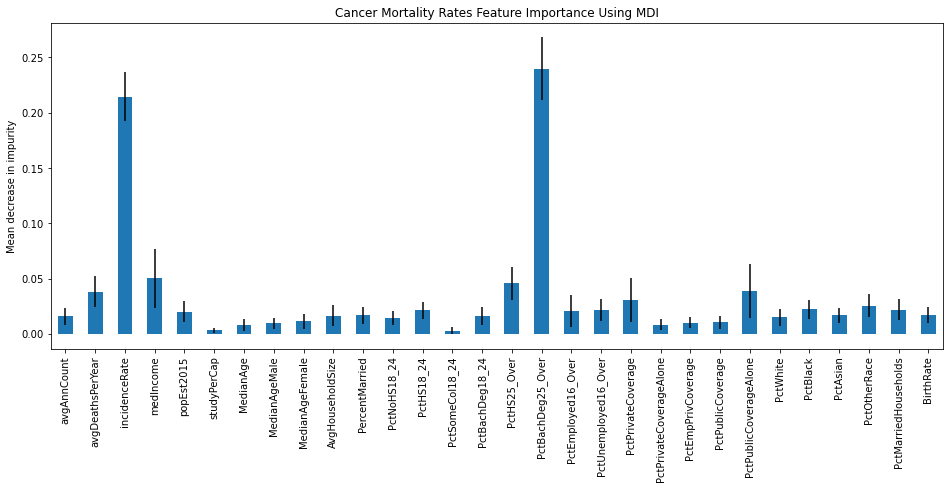

In [30]:
# Calculates mean decrease in impurity for each feature
importances = myforest.feature_importances_

# Standard deviation of feature importance
std = np.std([tree.feature_importances_ for tree in myforest.estimators_], axis=0)

# Bar Plot with indicating MDI ~ features
myforest_importances = pd.Series(importances, index=list(names))
fig, ax = plt.subplots(figsize=(16,6))
myforest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Cancer Mortality Rates Feature Importance Using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [31]:
# Feature importance in descending order
myforest_importances.sort_values(ascending=False)

PctBachDeg25_Over          0.239633
incidenceRate              0.214439
medIncome                  0.050085
PctHS25_Over               0.045653
PctPublicCoverageAlone     0.038341
avgDeathsPerYear           0.038175
PctPrivateCoverage         0.030737
PctOtherRace               0.025321
PctBlack                   0.022035
PctMarriedHouseholds       0.021851
PctUnemployed16_Over       0.021321
PctHS18_24                 0.021194
PctEmployed16_Over         0.020451
popEst2015                 0.019965
BirthRate                  0.016917
PctAsian                   0.016691
PercentMarried             0.016605
AvgHouseholdSize           0.016453
avgAnnCount                0.015858
PctBachDeg18_24            0.015738
PctWhite                   0.014782
PctNoHS18_24               0.014567
MedianAgeFemale            0.011145
PctPublicCoverage          0.010471
PctEmpPrivCoverage         0.010140
MedianAgeMale              0.009326
PctPrivateCoverageAlone    0.008274
MedianAge                  0

### Evaluation On The Test Set
Again, we should clarify that our cross-validation strategy is working as intended by partitioning our dataframe manually into training and testing sets, with equivalent analysis and with the goal to find similar results in both scenarios. We find the RMSE seen in our random forest test is higher than our averages seen via cross-validation - it is only marginally higher however (see code output), thus are cross-validation results seem satisfactory .

In [32]:
# ----Train Model----
myforesttest =RandomForestRegressor(bootstrap=True,max_depth=28,max_features='auto',min_samples_leaf=3,
                                 min_samples_split= 7,n_estimators= 450)
myforesttest.fit(X_train,y_train.values.ravel())

RandomForestRegressor(max_depth=28, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=450)

In [33]:
from sklearn.metrics import mean_squared_error

# ----Test Model----
forest_predictions = myforesttest.predict(X_test)
forest_mse=mean_squared_error(y_test, forest_predictions)
forest_rmse=np.sqrt(forest_mse)
print("forest rmse = ", forest_rmse)

forest rmse =  19.4592593785387


# **Validation**

In [34]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

## Retrain your chosen regression model here ---- Random Forest -----
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

myRF = RandomForestRegressor(bootstrap=True,max_depth=28,max_features='auto',min_samples_leaf=3,
                                 min_samples_split= 7,n_estimators= 450)
myRF.fit(df_tr,targets.values.ravel())

# Next write the lines of code required to predict on unseen test data and evaluate your predictions
RFscores = cross_val_score(myRF, num_pipeline.fit_transform(test_data),
                           test_targets.values.ravel(),scoring="neg_mean_squared_error", cv=10)
RFrmse = np.sqrt(-RFscores)
print("Prediction evaluation: RMSE average = ",RFrmse.mean()," with standard deviation = ",RFrmse.std())

Prediction evaluation: RMSE average =  24.136294212688796  with standard deviation =  7.1099359184905895
